# Búsqueda de Celdas Primitivas en un Intervalo Angular
En este ejemplo se utilizará Nookiin para explorar un sistema bicapa con un ángulo de rotación relativa entre capas variable dentro de un intervalo dado. El objetivo es encontrar celdas primitivas (PC) conmensurables para distintos valores de ángulo, siempre que la deformación requerida para lograr dicha conmensurabilidad en ambas capas sea menor que un valor umbral especificado, $\varepsilon$.

Este procedimiento es útil para analizar cómo varía la compatibilidad estructural entre capas en función del ángulo de rotación, lo cual es fundamental en el estudio de fenómenos como el moiré, la ingeniería de bandas y la modulación de propiedades electrónicas en sistemas bidimensionales apilados.

Durante el procedimiento se:

- Generará el sistema para distintos ángulos dentro del intervalo especificado.

- Buscarán soluciones conmensurables con deformaciones dentro del límite tolerado.

- Guardarán en archivos POSCAR aquellas configuraciones que cumplan los criterios establecidos.

- Guardará en un txt la información sobre las soluciones encontradas.

Este ejemplo resalta una de las principales funcionalidades de Nookiin: automatizar la búsqueda de superceldas eficientes para el estudio de heteroestructuras con rotaciones inter-capa, acelerando así el diseño y caracterización de materiales no convencionales.

### Carga de System y creación de Redes

In [1]:
import sys
import os

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

from System import *

Load System
Nook'iin Ready-to-work


In [2]:
VASP_Files = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'VASP_Files'))
G=importLattice(VASP_Files+'/01-graphene')
WS2=importLattice(VASP_Files+'/02-ws2')
G.name='Graphene'
WS2.name='WS2'
G.inAngle=119 #Con esto evitamos que el programa regrese solamente redes hexagonales

File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/01-graphene.vasp' will be read
--Lattice created successfully from file 'C:\SS\Nook’iin\Nook-iin\VASP_Files/01-graphene.vasp'--
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/02-ws2.vasp' will be read
--Lattice created successfully from file 'C:\SS\Nook’iin\Nook-iin\VASP_Files/02-ws2.vasp'--


### Función que efectúa la busqueda de Sistemas rotados que cumplen los requisitos.

In [3]:
def exploreSystems(L1,L2,tetas):
    ts=tetas.copy()
    Systems=[]
    orig = len(ts)
    i = 0
    errs = 0
    ep = 0.01
    m = 15
    for t in ts:
        i+=1
        if i==orig:
            print('***Exploring***')
            ep = 0.002
            m = 20
        s = System([L1,L2.mRot(t)])
        so = s.generateSuperCell(RoS=m, eps=ep,showTable=False,prntRes=False)
        pathS = os.path.join(os.getcwd(), 'VASP_Files/Systems-explored')
        pathT = os.path.join(os.getcwd(), 'VASP_Files/Systems-explored/Tablas')
        if not os.path.exists(pathS):
            print("Create folder Systems-explored")
            os.makedirs(pathS)
        if not os.path.exists(pathT):
            print("Create folder Tablas")
            os.makedirs(pathT)
        if so is not None:
            newt = cRot(so.redes[1].a)
            newName = f'{L1.name}-{L2.name}({newt:.5f}°)'
            if round(newt,5) not in ts:
                ts.append(round(newt,5))
                sAux=System([L1,L2.mRot(newt)])
                T = so.MT
                so,d=sAux.optimize_system(T,prnt=False)
                Systems.append([so,sAux])
                na=so.SuperRed.nOAtms()
                so.exportPC(PCname=f'Systems-explored/({na} atms)-{newName}')
                sAux.describeTM(T,prnt=f'Systems-explored/Tablas/{newName}',shw=False)
        else:
            print(f'*****No in theta={t}')
            errs+=1
    print(f'{errs} Errors, {len(Systems)} systems found')
    return Systems

#### Crea la lista de ángulos donde se explorará

In [4]:
minAng=0.02
maxAng=10
angs=[]
for i in range(int(minAng*100),int(maxAng*100)):
    angs.append(i/100)
print(f"Range:[{minAng},{maxAng}]")

Range:[0.02,10]


#### Exploración

In [5]:
Smts=exploreSystems(WS2,G,angs)

Lattice exported in:'C:\SS\Nook’iin\Nook-iin\Examples\Español\VASP_Files/Systems-explored/(309 atms)-WS2-Graphene(0_00000°).vasp'
The table was saved in: VASP_Files/Systems-explored/Tablas/WS2-Graphene(0.00000°).txt
Lattice exported in:'C:\SS\Nook’iin\Nook-iin\Examples\Español\VASP_Files/Systems-explored/(1547 atms)-WS2-Graphene(0_15727°).vasp'
The table was saved in: VASP_Files/Systems-explored/Tablas/WS2-Graphene(0.15727°).txt
Lattice exported in:'C:\SS\Nook’iin\Nook-iin\Examples\Español\VASP_Files/Systems-explored/(1025 atms)-WS2-Graphene(0_47482°).vasp'
The table was saved in: VASP_Files/Systems-explored/Tablas/WS2-Graphene(0.47482°).txt
Lattice exported in:'C:\SS\Nook’iin\Nook-iin\Examples\Español\VASP_Files/Systems-explored/(1530 atms)-WS2-Graphene(0_63612°).vasp'
The table was saved in: VASP_Files/Systems-explored/Tablas/WS2-Graphene(0.63612°).txt
Lattice exported in:'C:\SS\Nook’iin\Nook-iin\Examples\Español\VASP_Files/Systems-explored/(233 atms)-WS2-Graphene(1_04451°).vasp'
The

#### Muestra de algunos  de los resultados obtenidos

Size of the primitive vectors: |a|=48.90181Å, |b|=48.90181Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   9    9|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  729   |
|           WS2           |  |  -9   18|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  11   12|  |  | 1.00317 -0.00000|  |   +0.317% // -0.0°    |  794   |
|     Graphene(1.44°)     |  | -12   23|  |  |-0.00000  1.00317|  |   +0.317% // +0.0°    |        |
|                         |               |                       |                       |        |

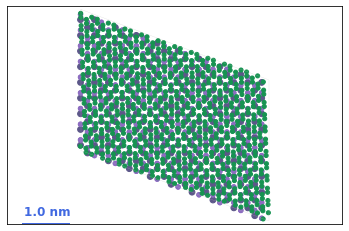

In [6]:
Smts[5][1].describeTM(Smts[5][1].MT)
Smts[5][0].SuperRed.showme(t=5)

Size of the primitive vectors: |a|=48.29432Å, |b|=48.29431Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |  13    4|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  711   |
|           WS2           |  |  -4   17|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  16    6|  |  | 1.00213 -0.00000|  |   +0.213% // -0.0°    |  776   |
|     Graphene(2.29°)     |  |  -6   22|  |  |-0.00000  1.00213|  |   +0.213% // +0.0°    |        |
|                         |               |                       |                       |        |

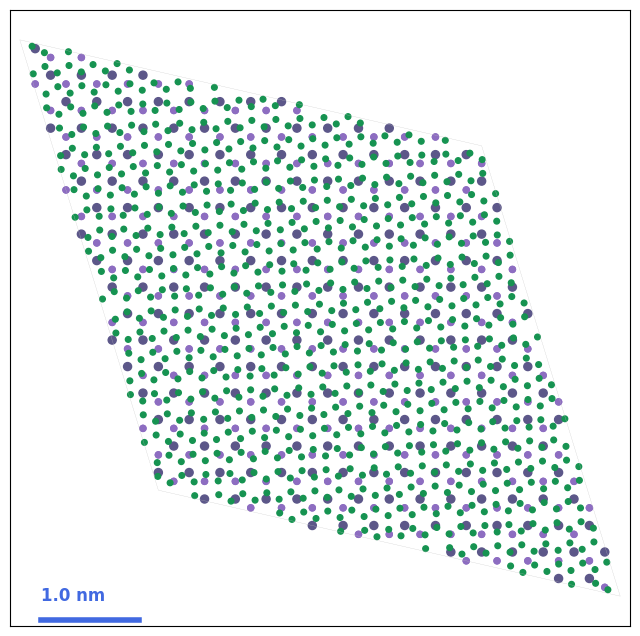

In [7]:
Smts[10][1].describeTM(Smts[10][1].MT)
Smts[10][0].SuperRed.showme(t=5)

Size of the primitive vectors: |a|=42.20473Å, |b|=42.20473Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   4   11|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  543   |
|           WS2           |  | -11   15|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |   4   15|  |  | 0.99431 -0.00000|  |   -0.569% // +0.0°    |  602   |
|     Graphene(3.40°)     |  | -15   19|  |  | 0.00000  0.99431|  |   -0.569% // +0.0°    |        |
|                         |               |                       |                       |        |

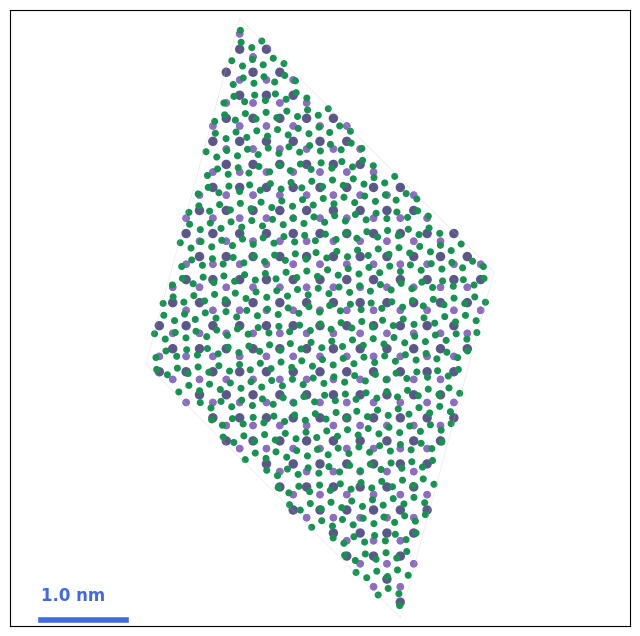

In [8]:
Smts[15][1].describeTM(Smts[15][1].MT)
Smts[15][0].SuperRed.showme(t=5)

Size of the primitive vectors: |a|=25.67789Å, |b|=25.67788Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   9   -2|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  201   |
|           WS2           |  |   2    7|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  11   -1|  |  | 0.99619 -0.00000|  |   -0.381% // +0.0°    |  222   |
|     Graphene(7.50°)     |  |   1   10|  |  | 0.00000  0.99619|  |   -0.381% // +0.0°    |        |
|                         |               |                       |                       |        |

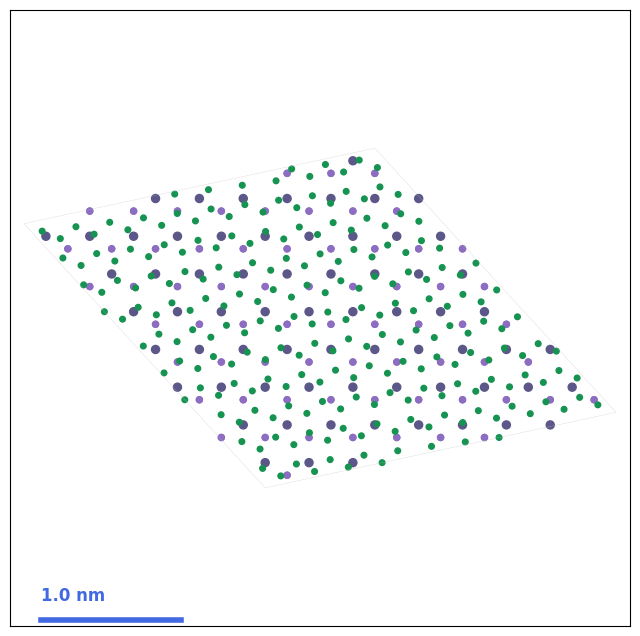

In [9]:
Smts[35][1].describeTM(Smts[35][1].MT)
Smts[35][0].SuperRed.showme(t=5)